In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import itertools
from scipy.sparse import csr_matrix

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
data= pd.read_csv("data.csv")
data_w_genre = pd.read_csv("data_w_genres.csv")

In [3]:
data_w_genre['genres_upd'] = data_w_genre['genres'].apply(lambda x: [re.sub(' ','_',i) for i in re.findall(r"'([^']*)'", x)])
data_w_genre['genres_upd'].values[0][0]

'show_tunes'

In [4]:
data['artists_upd_v1'] = data['artists'].apply(lambda x: re.findall(r"'([^']*)'", x))
data['artists'].values[0]

"['Mamie Smith']"

In [5]:
data['artists_upd_v1'].values[0][0]

'Mamie Smith'

In [6]:
data[data['artists_upd_v1'].apply(lambda x: not x)].head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,artists_upd_v1
1,0.643,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.950,1920,[]
34,0.021,"[""The Swingin' Bachelors""]",0.559,288293,0.830,0,0bq1lNI8OPhdRQYZZSSnQk,0.146000,11,0.1870,-7.876,0,Voodoo Doll,0,1920-02-29,0.0546,107.912,0.352,1920,[]
36,0.790,"[""The Swingin' Bachelors""]",0.745,261013,0.791,0,0e0zhCKclqwgJgA7Tjg2ca,0.000000,7,0.1020,-8.584,1,Penticton Kitty,0,1920-02-29,0.0595,120.169,0.658,1920,[]
46,0.147,"[""The Swingin' Bachelors""]",0.603,235547,0.719,0,0xKe1lGyWBuk3lx3JIUUUx,0.000000,0,0.1110,-5.464,0,Cloud 9,0,1920-02-29,0.0271,92.010,0.697,1920,[]
47,0.367,"[""The Swingin' Bachelors""]",0.716,264240,0.836,0,11rj3RWlVnnxW0EL7jwN8R,0.000006,9,0.1910,-6.099,1,Big Jim and the Twins,0,1920-02-29,0.0451,105.986,0.635,1920,[]


In [7]:
data['artists_upd_v2'] = data['artists'].apply(lambda x: re.findall('\"(.*?)\"',x))
data['artists_upd'] = np.where(data['artists_upd_v1'].apply(lambda x: not x), data['artists_upd_v2'], data['artists_upd_v1'] )

In [8]:
data['artists_song'] = data.apply(lambda row: row['artists_upd'][0]+row['name'],axis = 1)
data.sort_values(['artists_song','release_date'], ascending = False, inplace = True)
data[data['name']=='You'].head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,popularity,release_date,speechiness,tempo,valence,year,artists_upd_v1,artists_upd_v2,artists_upd,artists_song
82882,0.811,['The Aquatones'],0.236,119480,0.617,0,5gjrrteftTnx1yxH0FXVXS,0.0000,10,0.2050,...,24,1965-06-14,0.0362,115.607,0.297,1965,[The Aquatones],[],[The Aquatones],The AquatonesYou
153137,0.426,['Ten Sharp'],0.405,272984,0.901,0,01AfqEDao4dHz4bjpTVgsz,0.0185,11,0.1880,...,54,1991-04-13,0.0315,174.041,0.666,1991,[Ten Sharp],[],[Ten Sharp],Ten SharpYou
88220,0.426,['Ten Sharp'],0.405,272984,0.901,0,6lbme14HiDWYmGiw1I2Dv6,0.0185,11,0.1880,...,61,1991,0.0315,174.041,0.666,1991,[Ten Sharp],[],[Ten Sharp],Ten SharpYou
72058,0.691,['Switchfoot'],0.508,253440,0.407,0,1nJRA4gUMLi0PFeLQAoim3,0.5590,0,0.1340,...,47,1997-01-01,0.0285,147.880,0.285,1997,[Switchfoot],[],[Switchfoot],SwitchfootYou
108778,0.318,['Romeo Santos'],0.725,248813,0.625,0,1sQrCwV8vvtYLqa0KQlwE9,0.0000,9,0.0825,...,62,2012-08-27,0.0741,132.108,0.845,2012,[Romeo Santos],[],[Romeo Santos],Romeo SantosYou


In [9]:
data.drop_duplicates('artists_song',inplace = True)
data[data['name']=='You'].head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,popularity,release_date,speechiness,tempo,valence,year,artists_upd_v1,artists_upd_v2,artists_upd,artists_song
82882,0.811,['The Aquatones'],0.236,119480,0.617,0,5gjrrteftTnx1yxH0FXVXS,0.0000,10,0.2050,...,24,1965-06-14,0.0362,115.607,0.297,1965,[The Aquatones],[],[The Aquatones],The AquatonesYou
153137,0.426,['Ten Sharp'],0.405,272984,0.901,0,01AfqEDao4dHz4bjpTVgsz,0.0185,11,0.1880,...,54,1991-04-13,0.0315,174.041,0.666,1991,[Ten Sharp],[],[Ten Sharp],Ten SharpYou
72058,0.691,['Switchfoot'],0.508,253440,0.407,0,1nJRA4gUMLi0PFeLQAoim3,0.5590,0,0.1340,...,47,1997-01-01,0.0285,147.880,0.285,1997,[Switchfoot],[],[Switchfoot],SwitchfootYou
108778,0.318,['Romeo Santos'],0.725,248813,0.625,0,1sQrCwV8vvtYLqa0KQlwE9,0.0000,9,0.0825,...,62,2012-08-27,0.0741,132.108,0.845,2012,[Romeo Santos],[],[Romeo Santos],Romeo SantosYou
155629,0.429,['Raheem DeVaughn'],0.777,302187,0.654,0,4RMIDsxooqjhLIkxhlWzLa,0.0000,2,0.1050,...,45,2005,0.0336,124.009,0.515,2005,[Raheem DeVaughn],[],[Raheem DeVaughn],Raheem DeVaughnYou


In [10]:
artists_exploded = data[['artists_upd','id']].explode('artists_upd')
artists_exploded_enriched = artists_exploded.merge(data_w_genre, how = 'left', left_on = 'artists_upd',right_on = 'artists')
artists_exploded_enriched_nonnull = artists_exploded_enriched[~artists_exploded_enriched.genres_upd.isnull()]

In [11]:
artists_genres_consolidated = artists_exploded_enriched_nonnull.groupby('id')['genres_upd'].apply(list).reset_index()
artists_genres_consolidated['consolidates_genre_lists'] = artists_genres_consolidated['genres_upd'].apply(lambda x: list(set(list(itertools.chain.from_iterable(x)))))
artists_genres_consolidated.head()

,id,genres_upd,consolidates_genre_lists
0,000G1xMMuwxNHmwVsBdtj1,"[[candy_pop, dance_rock, new_wave, new_wave_po...","[rock, new_wave_pop, candy_pop, permanent_wave..."
1,000Npgk5e2SgwGaIsN3ztv,"[[classic_bollywood, classic_pakistani_pop, fi...","[sufi, classic_pakistani_pop, classic_bollywoo..."
2,000ZxLGm7jDlWCHtcXSeBe,"[[boogie-woogie, piano_blues, stride]]","[stride, piano_blues, boogie-woogie]"
3,000jBcNljWTnyjB4YO7ojf,[[bomba_y_plena]],[bomba_y_plena]
4,000mGrJNc2GAgQdMESdgEc,"[[classical, french_romanticism, late_romantic...","[french_romanticism, late_romantic_era, classi..."


In [12]:
Data = data.merge(artists_genres_consolidated[['id','consolidates_genre_lists',]], on = 'id',how = 'left')
Data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,release_date,speechiness,tempo,valence,year,artists_upd_v1,artists_upd_v2,artists_upd,artists_song,consolidates_genre_lists
0,0.568,['조정현'],0.447,237688,0.215,0,2ghebdwe2pNXT4eL34T7pW,0.000001,10,0.0649,...,1989-06-15,0.0272,71.979,0.1770,1989,[조정현],[],[조정현],조정현그아픔까지사랑한거야,[classic_korean_pop]
1,0.939,"['김효근', 'Quinever 퀸에버']",0.174,341821,0.321,0,6ra76urfo3pTD050opXTZS,0.756000,3,0.6950,...,2019-10-18,0.0422,138.300,0.0554,2019,"[김효근, Quinever 퀸에버]",[],"[김효근, Quinever 퀸에버]",김효근Promise of Thousand Years 천 년의 약속,[]
2,0.509,['김수철'],0.456,189245,0.321,0,4FG1uHQAVPsYiXIn3tcGRs,0.000001,4,0.1560,...,1983-08-15,0.0314,79.114,0.2100,1983,[김수철],[],[김수철],김수철못다핀 꽃한송이,[classic_korean_pop]
3,0.134,['龔詩嘉'],0.450,184120,0.782,0,2w5L5kQVkSRdduNewYPDA5,0.000000,0,0.0632,...,2015-07-31,0.0306,87.980,0.4750,2015,[龔詩嘉],[],[龔詩嘉],龔詩嘉My Island Home,"[singaporean_mandopop, singaporean_pop]"
4,0.381,['黑豹'],0.353,316160,0.686,0,3KIuCzckjdeeVuswPo20mC,0.000000,11,0.0568,...,1992-12-22,0.0395,200.341,0.3520,1992,[黑豹],[],[黑豹],黑豹DON'T BREAK MY HEART,"[chinese_indie, chinese_indie_rock]"


In [13]:
Data.shape

(158284, 24)

In [14]:
pd.set_option('display.max_columns', None)
Data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,artists_upd_v1,artists_upd_v2,artists_upd,artists_song,consolidates_genre_lists
0,0.568,['조정현'],0.447,237688,0.215,0,2ghebdwe2pNXT4eL34T7pW,0.000001,10,0.0649,-16.478,1,그아픔까지사랑한거야,30,1989-06-15,0.0272,71.979,0.1770,1989,[조정현],[],[조정현],조정현그아픔까지사랑한거야,[classic_korean_pop]
1,0.939,"['김효근', 'Quinever 퀸에버']",0.174,341821,0.321,0,6ra76urfo3pTD050opXTZS,0.756000,3,0.6950,-13.411,1,Promise of Thousand Years 천 년의 약속,0,2019-10-18,0.0422,138.300,0.0554,2019,"[김효근, Quinever 퀸에버]",[],"[김효근, Quinever 퀸에버]",김효근Promise of Thousand Years 천 년의 약속,[]
2,0.509,['김수철'],0.456,189245,0.321,0,4FG1uHQAVPsYiXIn3tcGRs,0.000001,4,0.1560,-16.682,0,못다핀 꽃한송이,24,1983-08-15,0.0314,79.114,0.2100,1983,[김수철],[],[김수철],김수철못다핀 꽃한송이,[classic_korean_pop]
3,0.134,['龔詩嘉'],0.450,184120,0.782,0,2w5L5kQVkSRdduNewYPDA5,0.000000,0,0.0632,-5.905,1,My Island Home,17,2015-07-31,0.0306,87.980,0.4750,2015,[龔詩嘉],[],[龔詩嘉],龔詩嘉My Island Home,"[singaporean_mandopop, singaporean_pop]"
4,0.381,['黑豹'],0.353,316160,0.686,0,3KIuCzckjdeeVuswPo20mC,0.000000,11,0.0568,-9.103,1,DON'T BREAK MY HEART,34,1992-12-22,0.0395,200.341,0.3520,1992,[黑豹],[],[黑豹],黑豹DON'T BREAK MY HEART,"[chinese_indie, chinese_indie_rock]"


In [15]:
data=Data.drop(['acousticness','release_date','year','artists','artists_upd','consolidates_genre_lists','artists_song','artists_upd_v2','artists_upd_v1','danceability','duration_ms','explicit','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','valence'],axis='columns')
data.head()

,id,name,popularity
0,2ghebdwe2pNXT4eL34T7pW,그아픔까지사랑한거야,30
1,6ra76urfo3pTD050opXTZS,Promise of Thousand Years 천 년의 약속,0
2,4FG1uHQAVPsYiXIn3tcGRs,못다핀 꽃한송이,24
3,2w5L5kQVkSRdduNewYPDA5,My Island Home,17
4,3KIuCzckjdeeVuswPo20mC,DON'T BREAK MY HEART,34


In [16]:
data.shape

(158284, 3)

In [17]:
music = data[data['popularity'] >=1]

In [18]:
data=music[118000:]

In [19]:
data.shape

(3610, 3)

In [20]:
float_cols = data.dtypes[data.dtypes == 'float64'].index.values

In [21]:
data.dtypes

id            object
name          object
popularity     int64
dtype: object

Unique 

In [22]:
unique_songs = data['name'].unique().shape[0]
print(f"There are {unique_songs} unique songs in the dataset")

There are 3569 unique songs in the dataset


In [23]:
unique_artists = data['name'].unique().shape[0]
print(f"There are {unique_artists} unique name in the dataset")

There are 3569 unique name in the dataset


In [24]:
unique_users = data['id'].unique().shape[0]
print(f"There are {unique_users} unique users in the dataset")

There are 3610 unique users in the dataset


In [25]:
#count how many rows we have by song, we show only the ten more popular songs 
ten_pop_songs = data.groupby('name')['popularity'].count().reset_index().sort_values(['popularity', 'name'], ascending = [0,1])
ten_pop_songs['percentage']  = round(ten_pop_songs['popularity'].div(ten_pop_songs['popularity'].sum())*100, 2)

In [26]:
ten_pop_songs = ten_pop_songs[:10]
ten_pop_songs

,name,popularity,percentage
2672,Silent Night,3,0.08
2675,Silver Bells,3,0.08
249,Autumn Leaves,2,0.06
342,Beautiful,2,0.06
540,Changes,2,0.06
627,Crazy For You,2,0.06
774,Don't Stop,2,0.06
1027,Friend Or Foe,2,0.06
1223,Head Over Heels,2,0.06
1389,I Miss You,2,0.06


In [27]:
labels = ten_pop_songs['name'].tolist()
counts = ten_pop_songs['popularity'].tolist()

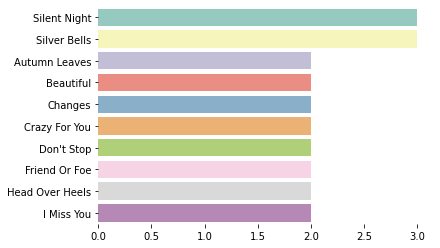

In [28]:
plt.figure()
sns.barplot(x=counts, y=labels, palette='Set3')
sns.despine(left=True, bottom=True)

Most popular artist

In [29]:
ten_pop_artists  = data.groupby(['name'])['popularity'].count().reset_index().sort_values(['popularity', 'name'],ascending = [0,1])

In [30]:
ten_pop_artists = ten_pop_artists[:10]
ten_pop_artists

,name,popularity
2672,Silent Night,3
2675,Silver Bells,3
249,Autumn Leaves,2
342,Beautiful,2
540,Changes,2
627,Crazy For You,2
774,Don't Stop,2
1027,Friend Or Foe,2
1223,Head Over Heels,2
1389,I Miss You,2


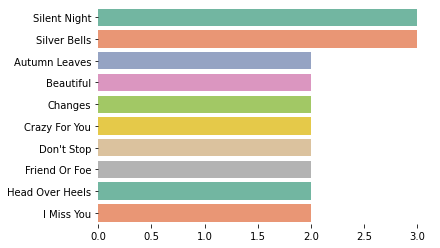

In [31]:
plt.figure()
label = ten_pop_artists['name'].tolist()
counts = ten_pop_artists['popularity'].tolist()
sns.barplot(x=counts, y=labels, palette='Set2')
sns.despine(left=True, bottom=True)

Listen count by user

In [32]:
listen_counts = pd.DataFrame(data.groupby('popularity').size(), columns=['count'])

In [33]:
print(f"The maximum time the same user listened to the same songs was: {listen_counts.reset_index(drop=False)['popularity'].iloc[-1]}")

The maximum time the same user listened to the same songs was: 96


In [34]:
listen_counts_temp = listen_counts[listen_counts['count'] > 50].reset_index(drop=False)

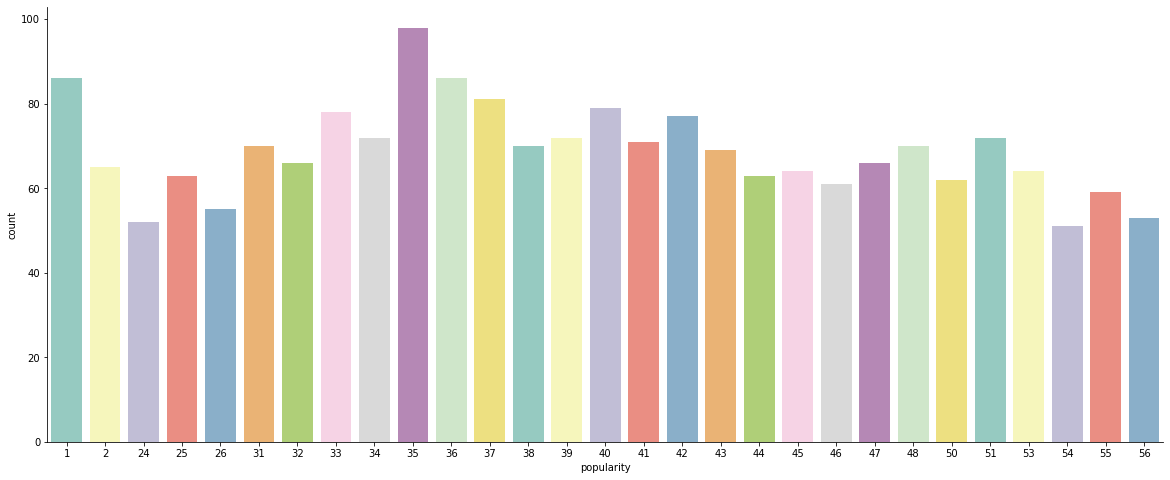

In [35]:
plt.figure(figsize=(20,8))
sns.barplot(x='popularity', y='count', palette='Set3', data=listen_counts_temp)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [36]:
data.head()

,id,name,popularity
153758,1Ul59k7dWx1FtjRJS3Ba5M,Drunken Hearted Boy - Live At The Fillmore Eas...,30
153759,3nlpOy9ybRjvBtJhsBI44T,Dreams - Live At Ludlow Garage/1970,20
153760,4AzEWaXaXUimgWh5V0r1xA,Dreams - 1973 Beginnings Mix,20
153761,6042VX2Q9qi43VoKLH4vrA,Dreams,25
153762,32HfSWEnSwJLkjFfqygqxg,Done Somebody Wrong - Live At The Final Fillmo...,20


Implemeting the Nearest Neighbor Model

For K-Nearest Neighbors, we want the data to be in an m x n array, where m is the number of artists and n is the number of users. To reshape the dataframe, we’ll pivot the dataframe to the wide format with artists as rows and users as columns. Then we’ll fill the missing observations with 0s since we’re going to be performing linear algebra operations (calculating distances between vectors). Finally, we transform the values of the dataframe into a scipy sparse matrix for more efficient calculations.

In [37]:
data['rating']=data['popularity']/10
data.head()

<ipython-input-37-14f17fc577d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating']=data['popularity']/10


,id,name,popularity,rating
153758,1Ul59k7dWx1FtjRJS3Ba5M,Drunken Hearted Boy - Live At The Fillmore Eas...,30,3.0
153759,3nlpOy9ybRjvBtJhsBI44T,Dreams - Live At Ludlow Garage/1970,20,2.0
153760,4AzEWaXaXUimgWh5V0r1xA,Dreams - 1973 Beginnings Mix,20,2.0
153761,6042VX2Q9qi43VoKLH4vrA,Dreams,25,2.5
153762,32HfSWEnSwJLkjFfqygqxg,Done Somebody Wrong - Live At The Final Fillmo...,20,2.0


In [38]:
music_stats = data.groupby('id')[['rating']].agg(['count', 'mean'])
music_stats.columns = music_stats.columns.droplevel()

In [39]:
C = music_stats['count'].mean()
m = music_stats['mean'].mean()

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return bayesian_avg

bayesian_avg_ratings = data.groupby('id')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['id', 'bayesian_avg']
music_stats = music_stats.merge(bayesian_avg_ratings, on='id')

In [40]:
music_stats = music_stats.merge(data[['id', 'name']])
music_stats.sort_values('bayesian_avg', ascending=False).head()

,id,count,mean,bayesian_avg,name
1794,3tjFYV6RSFtuktYl3ZtYcq,1,9.6,6.676565,Mood (feat. iann dior)
63,08mG3Y1vljYA6bvDt4Wqkj,1,8.4,6.076565,Back In Black
1324,2qxmye6gAegTMjLKEBoR3d,1,8.4,6.076565,Let Me Down Slowly
2889,6FuGJB290AQMAHTfjOYVaK,1,8.4,6.076565,"Mood (Remix) feat. Justin Bieber, J Balvin & i..."
2528,5SWnsxjhdcEDc7LJjq9UHk,1,8.4,6.076565,Runnin


In [41]:
music_stats.sort_values('bayesian_avg', ascending=True).head()

,id,count,mean,bayesian_avg,name
267,0dKegJc9IWss4wRSLmuzUs,1,0.1,1.926565,Quando La Radio
2967,6RqdaLCLZwwRZR5Ca64Nl2,1,0.1,1.926565,Annie
844,1qmETgfwM6wKBW1WAyVaKt,1,0.1,1.926565,All Things New (feat. Joel Hilliker)
2403,5ABD9oZGBstepFllDH5Wuc,1,0.1,1.926565,Alejandro Sanz: Pavane
2415,5BlrALYRi4AuyJEIwjE9Fu,1,0.1,1.926565,You'll Never Know


In [42]:
data.reset_index(inplace=True)
data.head()

,index,id,name,popularity,rating
0,153758,1Ul59k7dWx1FtjRJS3Ba5M,Drunken Hearted Boy - Live At The Fillmore Eas...,30,3.0
1,153759,3nlpOy9ybRjvBtJhsBI44T,Dreams - Live At Ludlow Garage/1970,20,2.0
2,153760,4AzEWaXaXUimgWh5V0r1xA,Dreams - 1973 Beginnings Mix,20,2.0
3,153761,6042VX2Q9qi43VoKLH4vrA,Dreams,25,2.5
4,153762,32HfSWEnSwJLkjFfqygqxg,Done Somebody Wrong - Live At The Final Fillmo...,20,2.0


In [43]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe
    
    """
    N = df['index'].nunique()
    M = df['id'].nunique()

    user_mapper = dict(zip(np.unique(df["index"]), list(range(N))))
    music_mapper = dict(zip(np.unique(df["id"]), list(range(M))))
    
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["index"])))
    music_inv_mapper = dict(zip(list(range(M)), np.unique(df["id"])))
    
    user_index = [user_mapper[i] for i in df['index']]
    music_index = [music_mapper[i] for i in df['id']]

    X = csr_matrix((df["rating"], (music_index, user_index)), shape=(M, N))
    
    return X, user_mapper, music_mapper, user_inv_mapper, music_inv_mapper

In [44]:
X, user_mapper, music_mapper, user_inv_mapper, music_inv_mapper = create_X(data)

knn

In [45]:

from sklearn.neighbors import NearestNeighbors

def find_similar_music(music_id, X, k, metric='cosine', show_distance=False):
    
    neighbour_ids = []
    
    music_ind = music_mapper[music_id]
    music_vec = X[music_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
    kNN.fit(X)
    if isinstance(music_vec, (np.ndarray)):
        music_vec = music_vec.reshape(1,-1)
    neighbour = kNN.kneighbors(music_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(music_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [46]:

music_names = dict(zip(data['id'], data['name']))

music_id = '3nlpOy9ybRjvBtJhsBI44T'

similar_ids = find_similar_music(music_id, X, k=10)
music_name = music_names[music_id]

print(f"Because you search:- {music_name}\n")
for i in similar_ids:
    print("-",music_names[i])

Because you search:- Dreams - Live At Ludlow Garage/1970

- What About Love
- Green Hornet Theme - From the Greenway-20th Century-Fox TV Series "The Green Hornet"
- I'll Never Get Enough of You
- I'm so Lonesome I Could Cry
- Dum Dum Diddle
- Everything but the Kitchen Sink
- Str8 Ballin'
- So Close
- Only Women Bleed
- Harlem Hendoo


In [47]:
music_names = dict(zip(data['id'], data['name']))

music_id = '3nlpOy9ybRjvBtJhsBI44T'

similar_ids = find_similar_music(music_id, X, k=10, metric="euclidean")
music_name = music_names[music_id]

print(f"Because you search:- {music_name}\n")
for i in similar_ids:
    print("-",music_names[i])

Because you search:- Dreams - Live At Ludlow Garage/1970

- My Shepherd Will Supply My Need (feat. Christina MC Carty)
- Wanna Make a Wish
- I'm Getting Sentimental Over You
- Mind Issues
- Paradox (FYHYM2019)
- Ah! Qui Mariérons-Nous?
- Decadent Butterfly - Original Mix
- Passano Gli Anni
- Twelve O'Clock High (1949) Opening Scene
- Gallio's House


In [48]:
music_names = dict(zip(data['id'], data['name']))

music_id = '3nlpOy9ybRjvBtJhsBI44T'

similar_ids = find_similar_music(music_id, X, k=10, metric="manhattan")
music_name = music_names[music_id]

print(f"Because you search:- {music_name}\n")
for i in similar_ids:
    print("-",music_names[i])

Because you search:- Dreams - Live At Ludlow Garage/1970

- My Shepherd Will Supply My Need (feat. Christina MC Carty)
- Wanna Make a Wish
- I'm Getting Sentimental Over You
- Mind Issues
- Paradox (FYHYM2019)
- Ah! Qui Mariérons-Nous?
- Decadent Butterfly - Original Mix
- Passano Gli Anni
- Twelve O'Clock High (1949) Opening Scene
- Gallio's House
